✅ Dataset loaded successfully!
Shape: (1000, 34)


,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType,AvgTimePerSession,EngagementPerVideo,EngagementPerVideo_Log
0,1,56,1,Pakistan,82812,True,True,Engineer,1,2,...,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data,4.705882,357.590909,5.882182
1,2,46,0,Mexico,27999,False,True,Artist,0,2,...,Computer,Android,5:00 PM,7,3,At school,Wi-Fi,16.285714,191.741935,5.261352
2,3,32,0,United States,42436,False,True,Engineer,1,4,...,Tablet,Android,2:00 PM,8,2,At home,Mobile Data,5.000000,1239.142857,7.122982
3,4,60,1,Barzil,62963,True,False,Waiting staff,1,3,...,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data,5.315789,60.414634,4.117648
4,5,25,1,Pakistan,22096,False,True,Manager,0,1,...,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data,22.666667,147.285714,4.999141



🔄 Encoding categorical features...
✅ Encoding complete!

=== Baseline Gradient Boosting ===
Accuracy: 1.0000
Precision (Macro): 1.0000
Recall (Macro): 1.0000
F1-score (Macro): 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        45
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        11

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



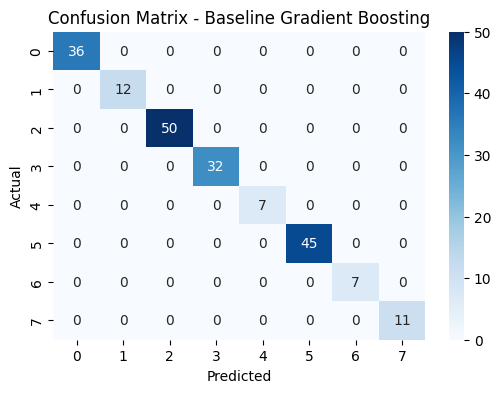


=== Tuned Gradient Boosting ===
Fitting 3 folds for each of 36 candidates, totalling 108 fits
✅ Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 1.0000
Precision (Macro): 1.0000
Recall (Macro): 1.0000
F1-score (Macro): 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        45
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        11

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



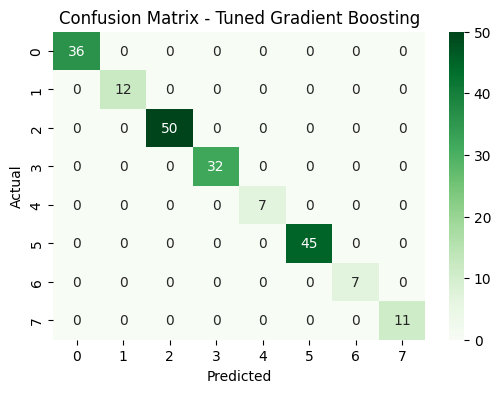


=== Model Performance Comparison ===


,Model,Accuracy,Precision (Macro),Recall (Macro),F1-score (Macro)
0,Baseline GB,1.0,1.0,1.0,1.0
1,Tuned GB,1.0,1.0,1.0,1.0


In [13]:
# ==========================================
# IMPORT LIBRARIES
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# ==========================================
# LOAD DATA
# ==========================================
# 👉 Change this filename to your actual dataset file name
df = pd.read_csv("/content/final_dataset.csv")

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
display(df.head())

# 👉 Replace 'target' with your dataset's target column name
target_column = "Addiction Level"

if target_column not in df.columns:
    raise ValueError(f"❌ The target column '{target_column}' was not found in the dataset. "
                     f"Available columns are: {list(df.columns)}")

# ==========================================
# ENCODE CATEGORICAL VARIABLES
# ==========================================
print("\n🔄 Encoding categorical features...")

label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

print("✅ Encoding complete!")

# ==========================================
# SPLIT DATA
# ==========================================
X = df.drop(target_column, axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==========================================
# BASELINE GRADIENT BOOSTING
# ==========================================
print("\n=== Baseline Gradient Boosting ===")

baseline_model = GradientBoostingClassifier(random_state=42)
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

# Metrics
acc_base = accuracy_score(y_test, y_pred_baseline)
prec_base = precision_score(y_test, y_pred_baseline, average='macro', zero_division=0)
rec_base = recall_score(y_test, y_pred_baseline, average='macro', zero_division=0)
f1_base = f1_score(y_test, y_pred_baseline, average='macro', zero_division=0)

print(f"Accuracy: {acc_base:.4f}")
print(f"Precision (Macro): {prec_base:.4f}")
print(f"Recall (Macro): {rec_base:.4f}")
print(f"F1-score (Macro): {f1_base:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred_baseline, zero_division=0))

# Heatmap for baseline model
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_baseline), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Baseline Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ==========================================
# TUNED GRADIENT BOOSTING (GRID SEARCH)
# ==========================================
print("\n=== Tuned Gradient Boosting ===")

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print(f"✅ Best Parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Metrics for tuned model
acc_tuned = accuracy_score(y_test, y_pred_tuned)
prec_tuned = precision_score(y_test, y_pred_tuned, average='macro', zero_division=0)
rec_tuned = recall_score(y_test, y_pred_tuned, average='macro', zero_division=0)
f1_tuned = f1_score(y_test, y_pred_tuned, average='macro', zero_division=0)

print(f"Accuracy: {acc_tuned:.4f}")
print(f"Precision (Macro): {prec_tuned:.4f}")
print(f"Recall (Macro): {rec_tuned:.4f}")
print(f"F1-score (Macro): {f1_tuned:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned, zero_division=0))

# Heatmap for tuned model
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Tuned Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ==========================================
# COMPARISON SUMMARY
# ==========================================
comparison = pd.DataFrame({
    'Model': ['Baseline GB', 'Tuned GB'],
    'Accuracy': [acc_base, acc_tuned],
    'Precision (Macro)': [prec_base, prec_tuned],
    'Recall (Macro)': [rec_base, rec_tuned],
    'F1-score (Macro)': [f1_base, f1_tuned]
})

print("\n=== Model Performance Comparison ===")
display(comparison)
